In [28]:
import json
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from pypalettes import load_cmap

# Import data and write function

In [29]:
# open and load JSON file
data_path = '/home/links/ct715/eddy_feedback/chapter1/annual_cycle/various_efp_methods/data/6hourly_efp/1958_2016/efp_results.json'
with open(data_path) as f:
    data_6h_58 = json.load(f)

In [30]:
# open and load JSON file
data_path = '/home/links/ct715/eddy_feedback/chapter1/annual_cycle/various_efp_methods/data/6hourly_efp/1979_2016/efp_results.json'
with open(data_path) as f:
    data_6h_79 = json.load(f)

In [31]:
# open and load JSON file
data_path = '/home/links/ct715/eddy_feedback/chapter1/annual_cycle/various_efp_methods/data/daily_efp/1958_2016/efp_results.json'
with open(data_path) as f:
    data_daily_58 = json.load(f)

In [32]:
# open and load JSON file
data_path = '/home/links/ct715/eddy_feedback/chapter1/annual_cycle/various_efp_methods/data/daily_efp/1979_2016/efp_results.json'
with open(data_path) as f:
    data_daily_79 = json.load(f)

In [33]:
import matplotlib.pyplot as plt
from pypalettes import load_cmap

def plot_combined_efp_annual_cycle(data_6h, data_daily, time_period="1958–2016", save=False):
    """
    Plot EFP annual cycles for 6-hourly & daily data in both hemispheres.

    Parameters
    ----------
    data_6h : dict
        Dictionary of 6-hourly EFP data.
    data_daily : dict
        Dictionary of daily EFP data.
    time_period : str
        String describing the time period (e.g., '1958–2016') to display in the title.
    """

    # mapping month number to letter
    month_map = {
        1: 'J', 2: 'F', 3: 'M', 4: 'A', 5: 'M', 6: 'J',
        7: 'J', 8: 'A', 9: 'S', 10: 'O', 11: 'N', 12: 'D'
    }

    # desired order starting from July
    month_order = [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
    month_to_july_idx = {m: i for i, m in enumerate(month_order)}

    sh_files = ['efp_pr_sh', 'efp_QG_sh']
    nh_files = ['efp_pr_nh', 'efp_QG_nh']

    # load highcontrast colormap
    cmap = load_cmap("highcontrast")

    # create 1x2 figure
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    datasets = [(data_daily, 'Daily'), (data_6h, '6-hourly')]

    for (dataset, ds_label) in datasets:
        for col, (files, hemi) in enumerate([(sh_files, 'Southern Hemisphere'),
                                                (nh_files, 'Northern Hemisphere')]):
            ax = axes[col]
            colors = cmap.colors[:len(files)]  # take enough colors for the lines

            for efp_file, color in zip(files, colors):
                efp_data = dataset[efp_file]

                months = []
                efps = []

                # extract central months and efp values
                for season, info in efp_data.items():
                    central_month = info['months'][1]  # middle month
                    months.append(central_month)
                    efps.append(info['efp'])

                # map months to July-based index
                months_july = [month_to_july_idx[m] for m in months]

                # sort by July-based index
                sorted_data = sorted(zip(months_july, efps))
                months_july_sorted, efps_sorted = zip(*sorted_data)
                
                # set label names
                if efp_file.split('_')[1] == 'pr':
                    efp_label = 'EFP_pr'
                else:
                    efp_label = 'EFP_QG'

                # plot with different styles for daily and 6-hourly
                if ds_label == 'Daily':
                    ax.plot(
                        months_july_sorted, efps_sorted, marker='o', linewidth=2,
                        color=color, label=f"{ds_label} {efp_label}", linestyle='--'
                    )
                else:
                    ax.plot(
                        months_july_sorted, efps_sorted, marker='o', linewidth=2,
                        color=color, label=f"{ds_label} {efp_label}"
                    )

            ax.set_xticks(range(12))
            ax.set_xticklabels([month_map[m] for m in month_order])
            ax.set_xlabel('Month')
            if col == 0:
                ax.set_ylabel('EFP')
                ax.set_title(f'$\\bf{{(a)}}$ {hemi}', fontsize=14)
            else:
                ax.set_title(f'$\\bf{{(b)}}$ {hemi}', fontsize=14)
            ax.grid(True, axis='y')
            ax.legend(handlelength=4)

    axes[0].set_ylim(0, 0.5)
    # fig.suptitle(f'EFP Annual Cycles: 6-hourly & Daily Data ({time_period})', fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    if save:
        plt.savefig(f'/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots/efp_annual_cycle_1979.png')
    
    plt.show()


# Combined

## 1958-2016

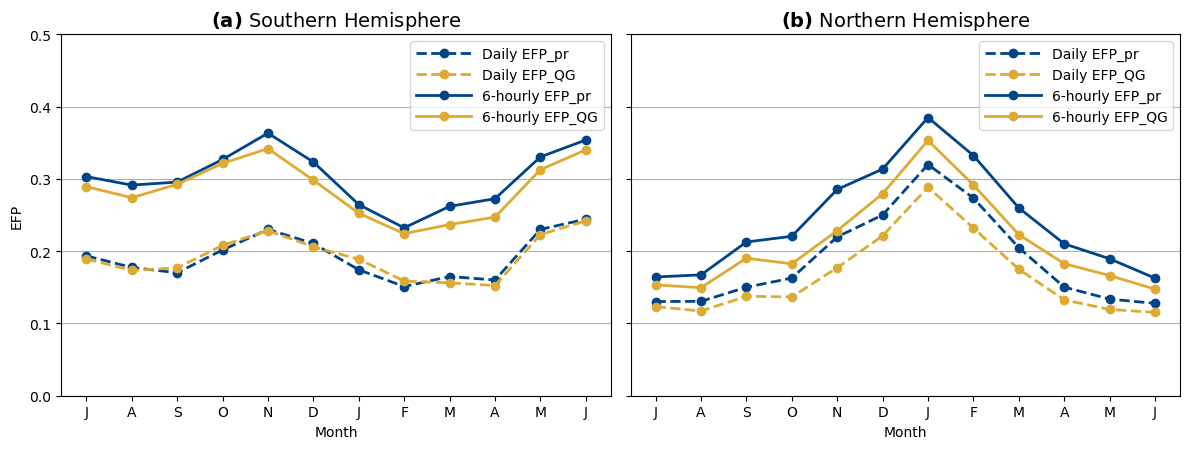

In [34]:
plot_combined_efp_annual_cycle(data_6h_58, data_daily_58, time_period="1958–2016")

## 1979-2016

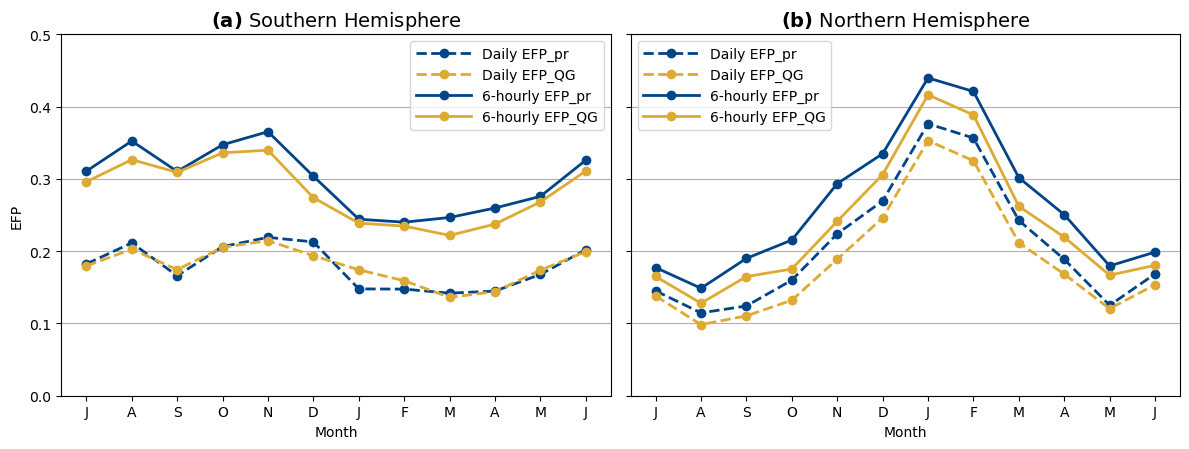

In [35]:
plot_combined_efp_annual_cycle(data_6h_79, data_daily_79, time_period="1979–2016")

In [36]:
import numpy as np

print(np.arange(1958,2017))

[1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]


# Save plot

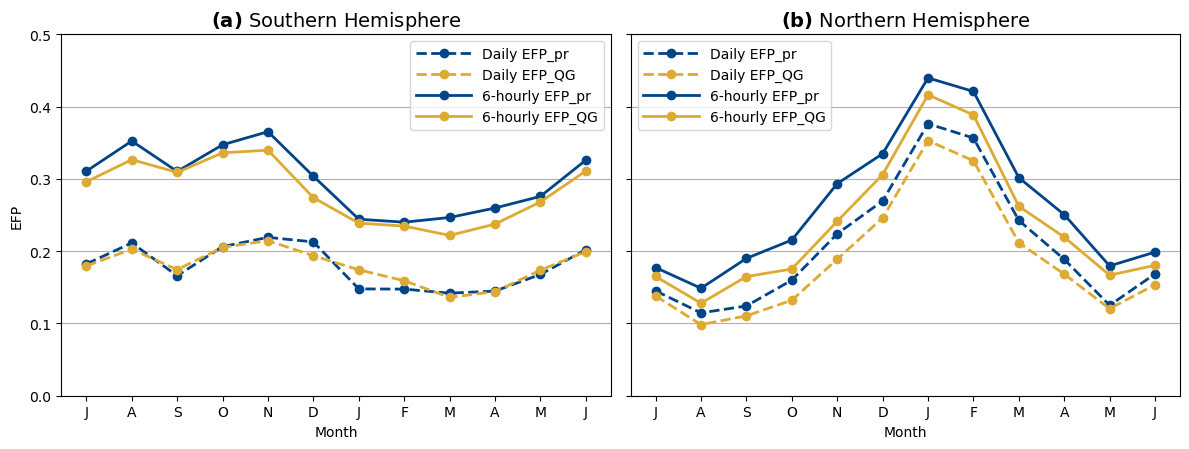

In [37]:
plot_combined_efp_annual_cycle(data_6h_79, data_daily_79, time_period="1979–2016", save=True)